In [1]:
import sys, json, subprocess, zipfile, shutil, random, itertools, time, pathlib, warnings
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import torch, torchvision
from torchvision.utils import make_grid
ROOT = Path.cwd()                           
DATA = ROOT/'data'
SRC  = ROOT/'src'
sys.path.append(str(SRC))


#Monet:  300 | #Photo: 7038


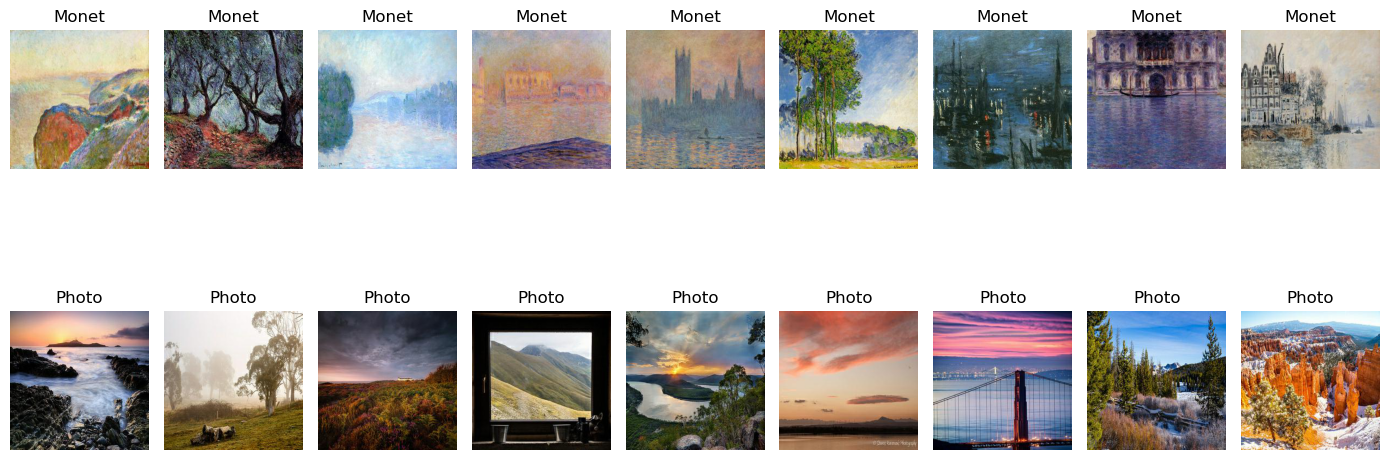

In [2]:
from collections import Counter
monet_imgs  = sorted((DATA/'monet_jpg').glob('*.jpg'))
photo_imgs  = sorted((DATA/'photo_jpg').glob('*.jpg'))
print(f"#Monet: {len(monet_imgs):>4} | #Photo: {len(photo_imgs):>4}")

# show a 3×6 grid: 3 Monet ↔ their random photo counterparts
fig, ax = plt.subplots(figsize=(14,7), nrows=2, ncols=9)
for col in range(9):
    m = Image.open(monet_imgs[col])
    p = Image.open(random.choice(photo_imgs))
    ax[0,col].imshow(m); ax[0,col].set_axis_off(); ax[0,col].set_title('Monet')
    ax[1,col].imshow(p); ax[1,col].set_axis_off(); ax[1,col].set_title('Photo')
plt.tight_layout()


In [3]:
from models import Generator, Discriminator
import torch

G = Generator()
D = Discriminator()

print("Generator (A→B)")
print(G)
print("\nDiscriminator (PatchGAN)")
print(D)


Generator (A→B)
Generator(
  (net): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
  

In [4]:
x = torch.randn(1,3,256,256)          # fake photo
with torch.no_grad():
    fake = G(x)
print("Input photo  →", x.shape)
print("Fake Monet   →", fake.shape)


Input photo  → torch.Size([1, 3, 256, 256])
Fake Monet   → torch.Size([1, 3, 256, 256])


In [5]:
!python -u src/train.py --monet_dir data/monet_jpg --photo_dir data/photo_jpg \
                        --epochs 200 --batch_size 4 --save_dir outputs --fp16


Epoch   1/200 | G= 7.899 | DA=0.381 | DB=0.350 | chkpt=E001_G_A2B.pt
Epoch   2/200 | G= 6.692 | DA=0.239 | DB=0.227 | chkpt=E002_G_A2B.pt
Epoch   3/200 | G= 6.275 | DA=0.226 | DB=0.213 | chkpt=E003_G_A2B.pt
Epoch   4/200 | G= 5.982 | DA=0.209 | DB=0.209 | chkpt=E004_G_A2B.pt
Epoch   5/200 | G= 5.854 | DA=0.213 | DB=0.169 | chkpt=E005_G_A2B.pt
Epoch   6/200 | G= 5.814 | DA=0.208 | DB=0.152 | chkpt=E006_G_A2B.pt
Epoch   7/200 | G= 5.720 | DA=0.195 | DB=0.142 | chkpt=E007_G_A2B.pt
Epoch   8/200 | G= 5.637 | DA=0.187 | DB=0.102 | chkpt=E008_G_A2B.pt
Epoch   9/200 | G= 5.618 | DA=0.185 | DB=0.084 | chkpt=E009_G_A2B.pt
Epoch  10/200 | G= 5.471 | DA=0.183 | DB=0.121 | chkpt=E010_G_A2B.pt
Epoch  11/200 | G= 5.469 | DA=0.184 | DB=0.081 | chkpt=E011_G_A2B.pt
Epoch  12/200 | G= 5.278 | DA=0.177 | DB=0.141 | chkpt=E012_G_A2B.pt
Epoch  13/200 | G= 5.157 | DA=0.165 | DB=0.151 | chkpt=E013_G_A2B.pt
Epoch  14/200 | G= 5.220 | DA=0.150 | DB=0.135 | chkpt=E014_G_A2B.pt
Epoch  15/200 | G= 5.250 | DA=0.12

C:\Users\Admin\Documents\University Degrees\University of Colorado Boulder\Current Courses\CSCA 5642 Introduction to Deep Learning (IN PROGRESS - Active - Projects Remain)\Week 5\GANs\src\train.py:55: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler  = GradScaler(enabled=cfg.fp16)
C:\Users\Admin\Documents\University Degrees\University of Colorado Boulder\Current Courses\CSCA 5642 Introduction to Deep Learning (IN PROGRESS - Active - Projects Remain)\Week 5\GANs\src\train.py:90: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=cfg.fp16):
C:\Users\Admin\miniconda3\envs\pcam\Lib\site-packages\torch\optim\lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_sche

Only run the cell below if recovering post crash.

In [ ]:
!python -u src/train.py --monet_dir data/monet_jpg --photo_dir data/photo_jpg \
                        --epochs 200 --batch_size 4 --save_dir outputs --fp16 \
                        --resume outputs/latest_G_A2B.pt


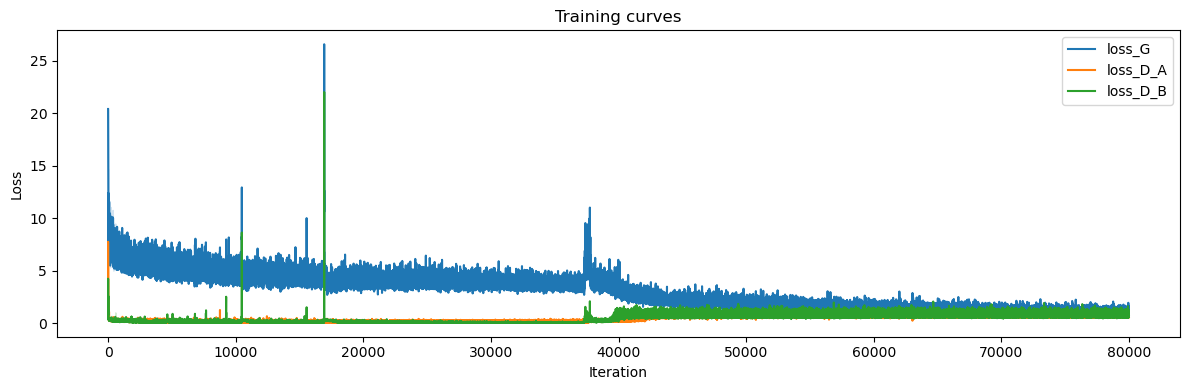

In [6]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
losses = pd.read_csv('outputs/losses.csv')

plt.figure(figsize=(12,4))
for col in ['loss_G','loss_D_A','loss_D_B']:
    sns.lineplot(x=losses['iter'], y=losses[col], label=col)
plt.xlabel('Iteration'); plt.ylabel('Loss'); plt.title('Training curves')
plt.legend(); plt.tight_layout()


In [7]:
!python src/infer.py --checkpoint outputs/latest_G_A2B.pt \
                     --photo_dir data/photo_jpg \
                     --out_dir   gen

# Zips exactly ONE folder named images
zip_path = ROOT/'images.zip'
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as z:
    for img in (ROOT/'gen').glob('*.jpg'):
        z.write(img, arcname=f'images/{img.name}')
print("🗜️  Created", zip_path, "→ ready to upload")


Generated 7038 images at gen


C:\Users\Admin\Documents\University Degrees\University of Colorado Boulder\Current Courses\CSCA 5642 Introduction to Deep Learning (IN PROGRESS - Active - Projects Remain)\Week 5\GANs\src\infer.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open a

🗜️  Created C:\Users\Admin\Documents\University Degrees\University of Colorado Boulder\Current Courses\CSCA 5642 Introduction to Deep Learning (IN PROGRESS - Active - Projects Remain)\Week 5\GANs\images.zip → ready to upload


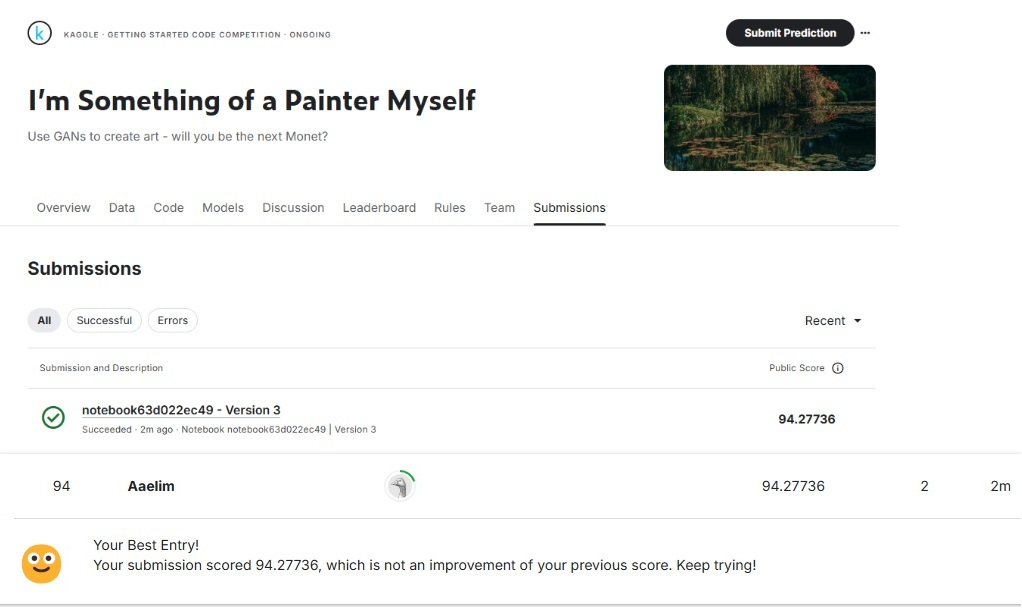

In [9]:
from IPython.display import Image, display
display(Image(filename="score.jpg", embed=True))